In [1]:
import pandas as pd

df = pd.read_csv('billionaires.csv')

In [2]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [4]:
df['wealth.worth in billions'].mean()

3.531943381790374

In [5]:
df['wealth.worth in billions'].median()

2.0

In [6]:
df['wealth.worth in billions'].mode()

0    1.1
Name: wealth.worth in billions, dtype: float64

In [7]:
df2 = df.sort_values(by='wealth.worth in billions').copy()

In [8]:
df2['wealth.worth in billions']

2613     1.0
1434     1.0
1433     1.0
1432     1.0
1431     1.0
        ... 
11      58.2
1       58.7
8       64.0
5       72.0
2       76.0
Name: wealth.worth in billions, Length: 2614, dtype: float64

In [9]:
df2 = df.sort_values(by='wealth.worth in billions',ignore_index=True).copy()

In [10]:
df2['wealth.worth in billions']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2609    58.2
2610    58.7
2611    64.0
2612    72.0
2613    76.0
Name: wealth.worth in billions, Length: 2614, dtype: float64

In [19]:
#trimmed mean: trimmed the top and bottom 5%
df2.loc[int(0.25*2613):int(0.75*2613),'wealth.worth in billions'].mean()
#chose to trim 25% off the top and bottom.  Most of the data is between 0-10 billion

2.1614384085692437

<AxesSubplot:ylabel='Frequency'>

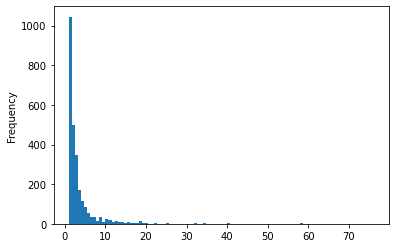

In [57]:
#Plot a histogram of COL1 data and comment on the relative locations of the mean, median, mode, and trimmed mean.
#Calculate the mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)
    #Comment as well on how they compare to each other and to the histogram plot.

df['wealth.worth in billions'].plot(kind='hist', bins=100)

#The mean, median, mode and trimmed all fall in the 4 bins. 

In [58]:
df['wealth.worth in billions'].median()

2.0

In [59]:
df['wealth.worth in billions'].mode()

0    1.1
Name: wealth.worth in billions, dtype: float64

In [60]:
df['wealth.worth in billions'].mean()

3.531943381790374

In [61]:
#Calculate the mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)
#Comment as well on how they compare to each other and to the histogram plot.
df['wealth.worth in billions'].mad()

2.563225238241023

In [62]:
df['wealth.worth in billions'].std()

5.08881256191711

<AxesSubplot:ylabel='Frequency'>

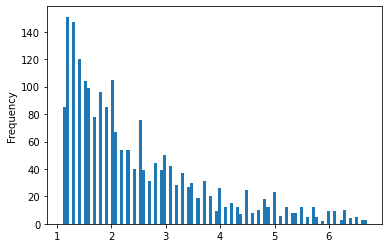

In [22]:
#histogram plot of trimmed mean
df2.loc[int(0.10*2613):int(0.90*2613),'wealth.worth in billions'].plot(kind='hist', bins=100)

In [63]:
df['wealth.worth in billions'].quantile(0.25)

1.4

In [64]:
df['wealth.worth in billions'].quantile(0.75)

3.5

In [ ]:
#interquantile range (3.5-1.4)= 2.1
#1.5 * IQR = 3.15

<AxesSubplot:>

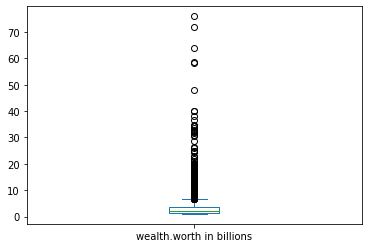

In [65]:
df['wealth.worth in billions'].plot(kind='box')

Q1 & Q3 are all located within 0-10 billion .  Most of the descriptive stats are located within the range of 0-5. 

In [51]:
import numpy as np


In [52]:
conditions = [
    (df['wealth.worth in billions'] < 0.5*df['wealth.worth in billions'].mean()),
    (df['wealth.worth in billions'] >= 0.5*df['wealth.worth in billions'].mean()) & (df['wealth.worth in billions'] < df['wealth.worth in billions'].mean()),
    (df['wealth.worth in billions'] >=df['wealth.worth in billions'].mean())    ]

values = [0,1,2 ]

df['COL1_mean_split']=np.select(conditions,values)

In [67]:
df['COL1_mean_split']

0       0
1       0
2       0
3       0
4       0
       ..
2609    2
2610    2
2611    2
2612    2
2613    2
Name: COL1_mean_split, Length: 2614, dtype: int32

<AxesSubplot:>

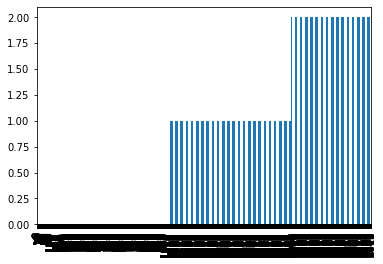

In [66]:
df['COL1_mean_split'].plot(kind='bar')

In [68]:
df[['COL1_mean_split','wealth.worth in billions']].corr()

,COL1_mean_split,wealth.worth in billions
COL1_mean_split,1.000000,-0.379908
wealth.worth in billions,-0.379908,1.000000


In [69]:
df[['wealth.worth in billions','demographics.age']].corr()

,wealth.worth in billions,demographics.age
wealth.worth in billions,1.00000,0.11987
demographics.age,0.11987,1.00000


<AxesSubplot:xlabel='wealth.worth in billions', ylabel='demographics.age'>

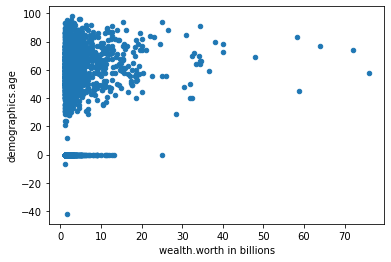

In [72]:
df.plot(kind='scatter',
        x='wealth.worth in billions',
        y='demographics.age')
#the calculated correlation does make since.  We can see from the plot there is not much of a correlation between wealth in billions vs demographic age

In [77]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='wealth.worth in billions', ylabel='demographics.age'>

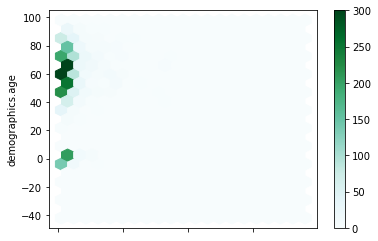

In [95]:
df.plot.hexbin(x='wealth.worth in billions',y='demographics.age',gridsize = 20)